In [1]:
#this code looks to compare the R2 value and run time for a given K select value.

from sklearn.datasets import fetch_openml
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn import utils
from sklearn import preprocessing
from sklearn import neighbors
from pandas import read_csv

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest

import csv
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
kfld = KFold(n_splits=3,random_state=42)

In [2]:
#Reads data in from data folder.


data = read_csv('data/ethylene_methane.txt',delim_whitespace=True)
print(data.shape)

(4178504, 19)


In [3]:
#creates a new attribute thats the % Methane, in cases where we divide by zero
#we recieve a NAN which is replaced by a 0
#this code also finds all unique PPM for methane

data['Methane%'] = (data['Methane(ppm)']/(data['Methane(ppm)']+data['Ethylene(ppm)']))
data['Methane%'] = data['Methane%'].fillna(0)

ppm = data['Methane(ppm)'].unique()
sensor_name = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16']

In [5]:
#This block searches for Outliers for each PPM of Methane and then drops them
#from the file.

for j in sensor_name:
    print(j)
    for i in np.sort(ppm):    
        data2 = data[data["Methane(ppm)"] == i] #only select a specific PPM to begin trimming
        
        results = data2[j].quantile([0.125,0.875]) #Next lines calculate the range for non-Outliers
        IQR_15 = 1.5*(results.loc[0.875] - results.loc[0.125])
        fq = results.loc[0.125] - IQR_15
        tq = results.loc[0.875] + IQR_15
                
        index = data2[(fq>data2[j]) | (tq<data2[j])] #Finds Outliers
        data = data.drop(index.index) #Uses index of Outliers to drop rows from data 
        
        
        #print('Methane(ppm) = ',i)
        #print('Outlier range',fq , tq)
        #print(data.shape)
        #print("")

sensor1
sensor2
sensor3
sensor4
sensor5
sensor6
sensor7
sensor8
sensor9
sensor10
sensor11
sensor12
sensor13
sensor14
sensor15
sensor16


In [6]:
#Defines our X and y and sets y equal to 1 if the Methane % is greater than 50%

X = data.drop(columns = ['Methane(ppm)','Ethylene(ppm)','Methane%'])
y = np.where(data['Methane%'] >= 0.5, 1, 0)

In [7]:
#This portion of code loops the SelectKbest function and test K values
#ranging from 1 to 17 and then calculates the logistic fit R2 value.
#We also record the run time for each fit to measure the increase in run time 
#to justify if a specific R2 is worth the time it takes to calculate

k_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
scores = list()
times = list()
for i in k_val:
    print('Starting k = ',i)
    X_best= SelectKBest(f_classif, k=i).fit_transform(X, y)

    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_best, y, test_size=0.40, random_state=42)
    X_train2 = 0
    y_train2 = 0
    X_train, X_test, y_train, y_test = train_test_split(X_test2, y_test2, test_size=0.50, random_state=42)  
    
    start = time.time()
    clf = LogisticRegression(random_state=42, solver='lbfgs',max_iter=10000,n_jobs = -1).fit(X_train, y_train)
    score = cross_val_score(clf, X_test, y_test, cv=kfld, scoring='r2').mean()
    end = time.time()
    
    print('R2 = ',score)
    print('Time (sec) = ',(end-start))
    print('')
    scores.append(score)
    times.append((end-start))


Starting k =  1
R2 =  0.833929934707216
Time (sec) =  14.08881163597107

Starting k =  2
R2 =  0.8305516861006929
Time (sec) =  16.079622268676758

Starting k =  3
R2 =  0.9120199367486714
Time (sec) =  21.32739496231079

Starting k =  4
R2 =  0.9122437569974732
Time (sec) =  26.460062265396118

Starting k =  5
R2 =  0.906959956616422
Time (sec) =  25.369069576263428

Starting k =  6
R2 =  0.9113640855315851
Time (sec) =  38.84532427787781

Starting k =  7
R2 =  0.9115462425933799
Time (sec) =  70.10526204109192

Starting k =  8
R2 =  0.910739993586219
Time (sec) =  123.9462149143219

Starting k =  9
R2 =  0.9136231386019089
Time (sec) =  271.96247029304504

Starting k =  10
R2 =  0.9073192074693134
Time (sec) =  231.2548062801361

Starting k =  11
R2 =  0.9179020249710969
Time (sec) =  336.626424074173

Starting k =  12
R2 =  0.9176312373604478
Time (sec) =  95.55302834510803

Starting k =  13
R2 =  0.9180476362857067
Time (sec) =  214.28886318206787

Starting k =  14
R2 =  0.91939062

Text(0, 0.5, 'R2')

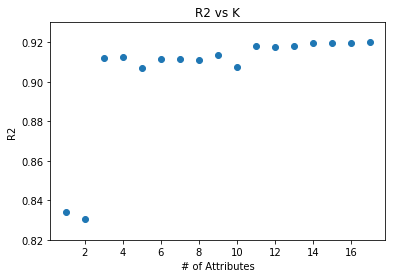

In [8]:
#Plots the R2 vs the K value calculated in the previou block

plt.ylim(0.82, 0.93) 
plt.scatter(k_val,scores)
plt.title("R2 vs K")
plt.xlabel("# of Attributes")
plt.ylabel("R2")

Text(0, 0.5, 'Time (sec)')

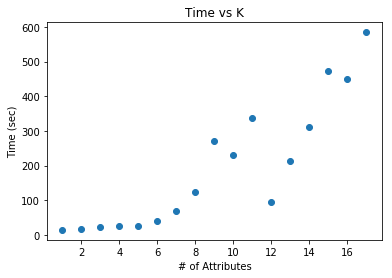

In [9]:
#Plots the Time vs the K value calculated in the previou block

plt.scatter(k_val,times)
plt.title("Time vs K")
plt.xlabel("# of Attributes")
plt.ylabel("Time (sec)")

In [16]:
#Returns which attributes to drop after running selectKbest.

k_best = SelectKBest(score_func=f_classif, k=12).fit(X, y)
print(k_best.get_support())

[False False False  True  True  True  True  True  True False False  True
  True  True  True  True  True]


In [17]:
#We printed out the attribute names so we could match them up to the previous 
#lines results.
print(X.columns)

Index(['Time(sec)', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11',
       'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16'],
      dtype='object')
